In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df=pd.read_csv('cleaned_customer_segmentation.csv')
print("\nFirst 10 rows with all columns:")
print(df.head(10))


First 10 rows with all columns:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  2012-09-04       58     

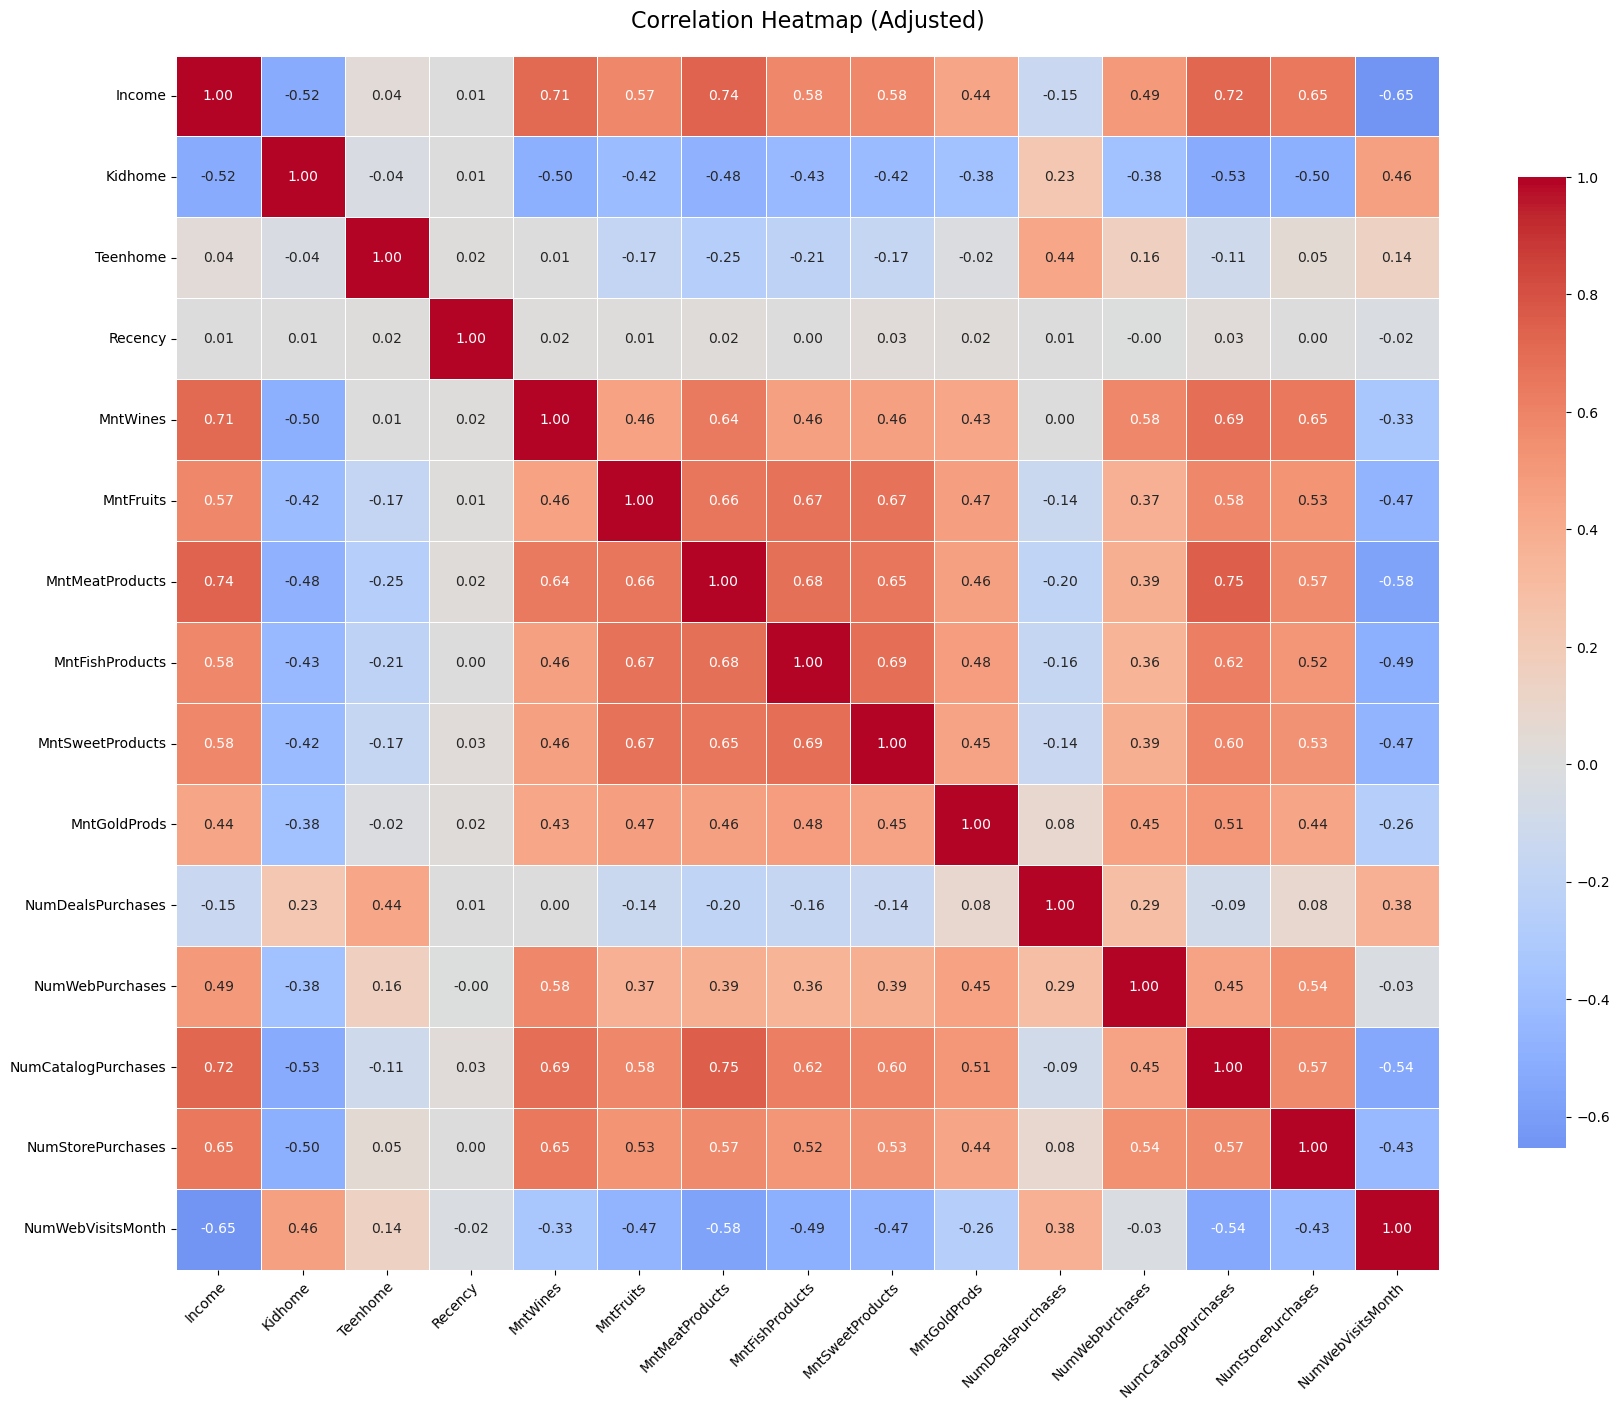

In [2]:

# Select numerical columns (exclude IDs/constants)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
cols_to_drop = ['ID','Year_Birth','Dt_Customer','Complain','Response','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
numerical_cols = [col for col in numerical_cols if col not in cols_to_drop]

# Calculate correlations
corr_matrix = df[numerical_cols].corr()

# Set up the plot
plt.figure(figsize=(18, 14))  # Increased size for more columns

# Create heatmap with adjustments
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8},
    annot_kws={'size': 10}  # Smaller annotation font
)

# Rotate and align labels
plt.xticks(
    rotation=45,
    ha='right',
    rotation_mode='anchor'
)
plt.yticks(rotation=0)

# Force tight layout and adjust margins
plt.tight_layout(pad=2.0)  # Extra padding
plt.title('Correlation Heatmap (Adjusted)', fontsize=16, pad=20)
plt.show()

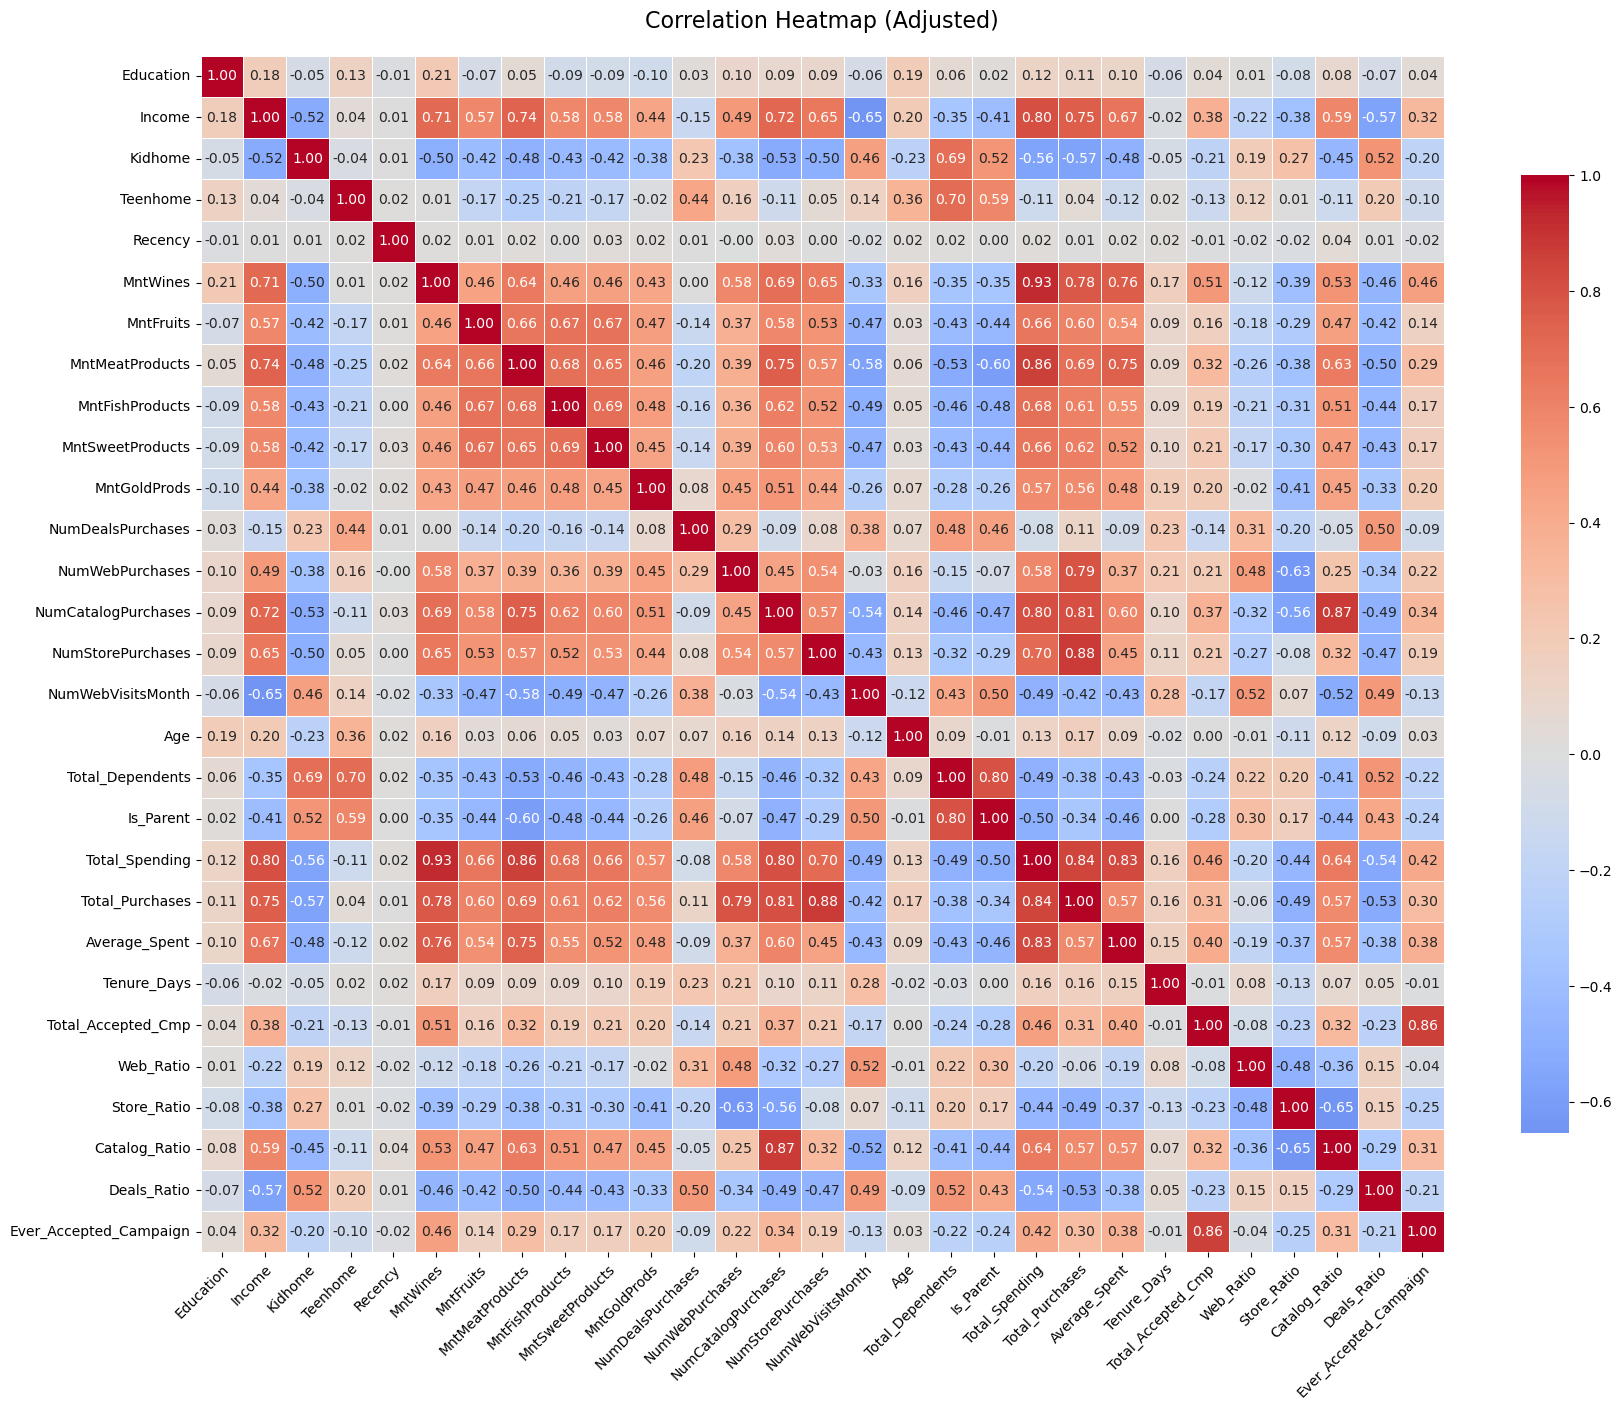

In [3]:


#this is the heatmap for the featured csv

# Load data
df = pd.read_csv('featured_customer_segmentation.csv')

# Select numerical columns (exclude IDs/constants)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
cols_to_drop = ['ID', 'Year_Birth', 'Dt_Customer', 'Complain', 'Response', 'AcceptedCmp1', 'AcceptedCmp2',
                'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
numerical_cols = [col for col in numerical_cols if col not in cols_to_drop]

# Calculate correlations
corr_matrix = df[numerical_cols].corr()

# Set up the plot
plt.figure(figsize=(18, 14))  # Increased size for more columns

# Create heatmap with adjustments
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8},
    annot_kws={'size': 10}  # Smaller annotation font
)

# Rotate and align labels
plt.xticks(
    rotation=45,
    ha='right',
    rotation_mode='anchor'
)
plt.yticks(rotation=0)

# Force tight layout and adjust margins
plt.tight_layout(pad=2.0)  # Extra padding
plt.title('Correlation Heatmap (Adjusted)', fontsize=16, pad=20)
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# standard scaler
from sklearn.preprocessing import StandardScaler
